In [3]:
import numpy as np  
import matplotlib.pyplot as plt 
import pandas as pd 
from IPython.display import Image, HTML 
import os 

In [28]:
image_dir = 'archive/images/'
df = pd.read_csv('archive/pokedex.csv')

# Atualizar o DataFrame com o caminho correto das imagens
df['Image'] = df['Image'].apply(lambda x: os.path.join(image_dir, os.path.basename(x)))

# Função para converter o caminho das imagens em HTML para exibição
def path_to_image_html(path):
    return f'<img src="{path}" width="60" >'

# Aplicar a função para converter os caminhos em HTML
df['Image'] = df['Image'].apply(path_to_image_html)

# Usar o Styler do pandas para renderizar a tabela com HTML
df_styled = df.style.format({'Image': lambda x: x}).set_table_styles([
    {'selector': 'tr:hover', 'props': [('background-color', '#f2f2f2')]},
    {'selector': 'th', 'props': [('background-color', '#404040'), ('color', 'white')]}
])
#df_styled

In [37]:
#Filtro de tipos 1 pokedex 
filtro_tipo1 = df[df['Type 1'] == 'Electric']

filtro_tipo1_styled = filtro_tipo1.style.format({"Image": lambda x: x})
#filtro_tipo1_styled

In [42]:
#Sort de valores 
df_sorted = df.sort_values(by = 'Attack', ascending = False)
df_sorted_style = df_sorted.style.format({"Image": lambda x: x})

#df_sorted_style

In [65]:
#Busca por pokemon específico
user_request = input('Type a pokémon name: ')

#result = df[df['Name'].str.contains(user_request)]
result = df[df['Name'].str.contains(user_request)]
result_styled = result.style.format({"Image": lambda x: x})

result_styled

,Image,Index,Name,Type 1,Type 2,Total,HP,Attack,Defense,SP. Atk.,SP. Def,Speed
637,,524,Roggenrola,Rock,nan,280,55,75,85,25,25,15


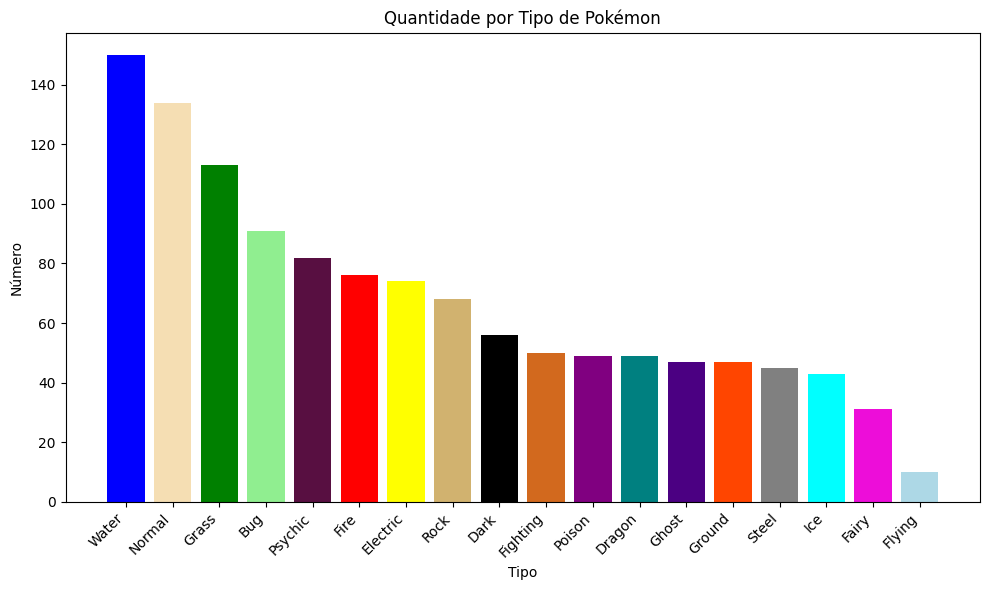

In [117]:
tipo1_pokemon_contagem = df['Type 1'].value_counts()
#print(tipo1_pokemon_contagem)

cores_tipos = {
    'Grass' : 'green',
    'Fire' : 'red',
    'Normal': 'wheat',
    'Water': 'blue',
    'Bug' : 'lightgreen',     
    'Psychic': '#580F41',
    'Electric': 'yellow',
    'Rock': '#D1B26F',     
    'Dark': 'black',         
    'Fighting': '#D2691E',   
    'Poison': 'purple',      
    'Dragon': '#008080',     
    'Ghost': '#4B0082',       
    'Ground': 'orangered',      
    'Steel': 'grey',       
    'Ice': 'cyan',         
    'Fairy': '#ED0DD9',       
    'Flying': 'lightblue'       
}
cores = [cores_tipos[tipo] for tipo in tipo1_pokemon_contagem.index]

plt.figure(figsize=(10, 6))
plt.bar(tipo1_pokemon_contagem.index, tipo1_pokemon_contagem.values, color=cores)
plt.title('Quantidade por Tipo de Pokémon')
plt.xlabel('Tipo')
plt.ylabel('Número')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()